# Лабораторная работа 3.2.1 Сдвиг фаз в цепи переменного тока.
### Выполнил Глобин Дмитрий 
### Группа Б01-105

## 1. Аннотация.
__Цель работы__: изучить влияние активного сопротивления, индуктивности и ёмкости на свдиг фаз между током и напряжением

__В работе используются__: генератор звуковой частоты (ЗГ), двухканальный осциллограф (ЭО), магазин ёмкостей, магазин сопротивлений, катушка индуктивности, резисторы, универсальный измеритель импеданса (LCR-метр).

## 2. Теоретические сведения.

### 2.1 Свободные колебания
Для резистора с сопротивлением $R: U_R = IR$

Для резистора ёмкостью $С: I = \frac{dq}{dt} = C\frac{dU_C}{dt}$

Для катушки с коэффициентом самоиндукции $L: U_L = L\frac{dI}{dt}$

Рассмотрим контур, состоящий из последовательно соединённых конденсатора C, резистора R и катушки индуктивности L. Сумма падений напряжений в отсутствие ЭДС равну нулю:

$RI + U_C + L\frac{dI}{dt} = 0$

Подставив выражения: $CL\frac{d^2U_C}{dt^2} + CR\frac{dU_C}{dt} + U_C = 0$

Разделим на LC и введём обозначения:
$\gamma = \frac{R}{2L}, \omega_0^2 = \frac{1}LC{}$

Где $\gamma$ - \textbf{коэффициент затухания}, $\omega_0$ - __собственная круговая частота__.

Период собственных колебаний $T_0$:
$T_0 = \frac{2\pi}{\omega_0} = 2\pi\sqrt{LC}$

Тогда для напряжения на конденсаторе получим выражение:
$\ddot{U}_C + 2\gamma\dot{U}_C + \omega_0^2U_C = 0$

Аналогичный вид имеют уравнения для $I, q, U_R, U_L$

Для решения этого уравнения введём вспомогательную переменную $U(t)$:
$U_C(t) = U(t)e^{-\gamma t}$

Тогда получаем:
$\ddot{U} + \omega_1^2U = 0$

где
$\omega_1^2 = \omega_0^2 - \gamma^2$

### 2.2 Вычисление мощности в методе комплексных амплитуд.

$P = <U \cdot I> = \frac{1}{T}\int_0^TReU \cdot ReI dt$

$ReU = \frac{U+U^{*}}{2}$

$ReI = \frac{I+I^{*}}{2}$

$P = \frac{1}{2}(U_0I_0^* + I_0U_0^*) = \frac{1}{2}ReU_0I_0^* = \frac{1}{2}U_{c0}I_0cos(\Delta\psi)$

$\Delta\psi = \psi_U - \psi_I$ - разность фаз между напряжнием и током в элементе.

$I_{эфф} \equiv \sqrt{<I^2(t)>}$, $U_{эфф} \equiv \sqrt{<U^2(t)>}$

$U_{эфф}^2 = \frac{1}{T} \int_0^T U^2dt$

$I_{эфф}^2 = \frac{1}{T} \int_0^T I^2dt$

Для гармонических колебаний колебаний колебаний имеем $U_{эфф} = \frac{U_{c_0}}{\sqrt{2}}$ и $I_{эфф} = \frac{I_{0}}{\sqrt{2}}$

Тогда формула для мощности приобретает вид: $P = U_{эфф}I_{эфф}cos(\Delta\psi)$

## 3. Схема установки. 

![gist](./схема_сдвиг.png)
<p style="text-align: center;">Рис.1 Схема1 для измерения сдвига фаз </p>

Измерение разности фаз с помощью этой схемы удобно проводить следующим образом:

1) подобрать частоту горизонтальной развёртки, при которой на экране укладывается чуть больше половины периода синусоиды;

2) отцентрировать горизонтальную ось;

3) измерить расстояние $x_0$ (см. рисунок) между нулевыми значениями _одного_ из синалов, что соответствует разности фаз $\pi$;

4) измерить расстояние $x$ между нулевыми значениями двух синусоид и пересчитать их в сдвиг по фазе: $\psi = \pi \frac{x}{x_0}$.

### Рассчёт погрешностей 

$$
\sigma_{ctg(\psi)} = \sqrt{(\frac{1}{x_0(sin(x/x_0))^2}\sigma_x)^2 + (\frac{x}{(x_0)^2(sin(x/x_0))^2}\sigma_{x_0})^2}
$$

$$
\sigma_{\omega RC}= \omega RC \sqrt{(\frac{\sigma_{R}}{R})^2 + (\frac{\sigma_{\omega}}{\omega})^2}
$$

$$
\sigma_{R/(\omega L)}= R/(\omega L) \sqrt{(\frac{\sigma_{R}}{R})^2 + (\frac{\sigma_{L}}{L})^2}
$$

$$
\sigma_{\frac{\nu}{\nu_0}} = \frac{\nu}{\nu_0}\sqrt{(\frac{\sigma_{\nu}}{\nu})^2 + (\frac{\sigma_{\nu_0}}{\nu_0})^2}
$$

## 4. Обработка результатов.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

df1 = pd.DataFrame()

### 4.1 Исследование сдвига фаз между током и напряжением в RC-цепи.

Установим следующие значения:

$C = 0.5$ мкФ

$\nu = 1$ кГц

и будет изменять $R$ от 0 Ом до $\frac{1}{\omega C}$

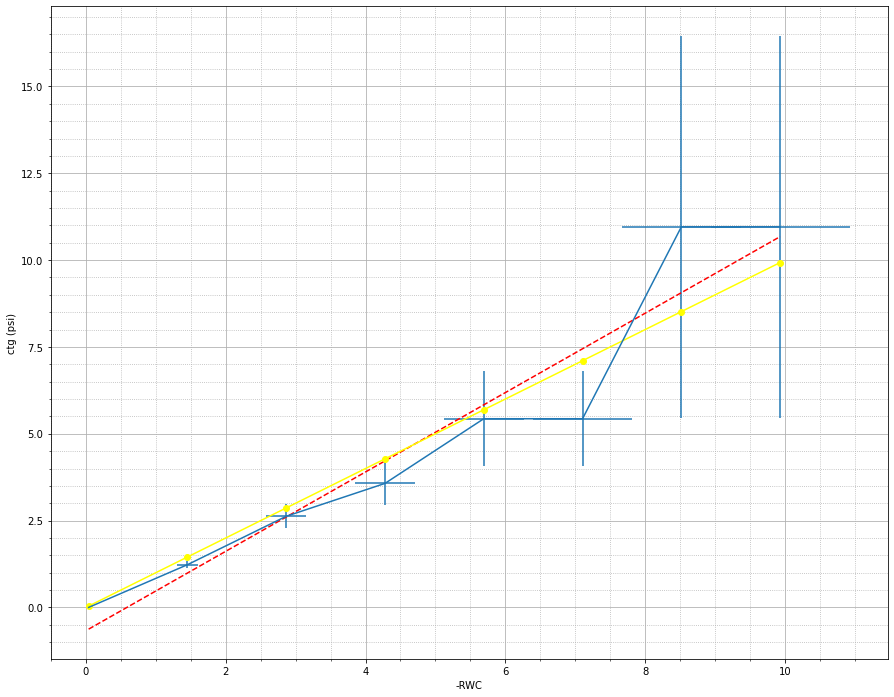

In [92]:
def ctg(x):
    return 1 / math.tan(x)

r = 12.4
# RC-цепь
# R от 0 до 3183 Ом
R_RC = np.array([0, 450, 900, 1350, 1800, 2250, 2700, 3150])
x_RC = np.array([8.5, 3.75, 2, 1.5, 1, 1, 0.5, 0.5])
x0_RC = np.array([34, 34.5, 34.5, 34.5, 34.5, 34.5, 34.5, 34.5])
# print (len(R_RC), len(x_RC), len(x0_RC))

df1["R_Rc, Om"] = R_RC
df1["x_Rc, Om"] = x_RC
df1["x0_Rc, Om"] = x0_RC

fig, ax = plt.subplots(figsize = (15, 12))
#axes = fig.add_axes([0, 0, 1, 1])

ax.set_ylabel("ctg (psi)")
ax.set_xlabel("-RWC")
ax.minorticks_on()
ax.grid(which = 'major')
ax.grid(which = 'minor', linestyle = ':')

wRC = (R_RC + r) * 2 * 3.14 * 1000 * 0.5 * 10**(-6)
ctg_pi_x_x0 = 3.14 * x_RC / x0_RC * 2
ctg_pi_x_x0 = np.array([ctg(i) for i in ctg_pi_x_x0])
ax.errorbar(wRC, ctg_pi_x_x0, yerr = df1["sigma_ctg_1"], xerr = df1["sigma(wRC)"])

df1["R_Rc, Om"] = R_RC
df1["x_Rc, Om"] = x_RC
df1["x0_Rc, Om"] = x0_RC
df1["wRC"] = wRC
df1["ctg_pi_x_x0"] = ctg_pi_x_x0

p = np.polyfit(wRC, ctg_pi_x_x0, 1)
ya = np.polyval(p, wRC)
ax.plot(wRC, ya, linestyle='dashed', color='red')

# Theoretical ctg(psi)
ax.plot(wRC, wRC, '-o', color='yellow')

plt.show()

In [91]:
df1["sigma(wRC)"] = df1["wRC"] * np.sqrt((1/df1["R_Rc, Om"]) ** 2 + (10/1000))
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1 = df1.fillna(0)


df1["sigma_ctg_1"] = df1["x0_Rc, Om"] / (2 * np.pi * df1["x_Rc, Om"]) * np.sqrt((0.25/df1["x_Rc, Om"]) ** 2 + (0.25/df1["x0_Rc, Om"]) ** 2)


df1

,"R_Rc, Om","x_Rc, Om","x0_Rc, Om",wRC,ctg_pi_x_x0,sigma(wRC),sigma_ctg_1
0,0,8.50,34.0,0.038936,0.000796,0.000000,0.019300
1,450,3.75,34.5,1.451936,1.230035,0.145229,0.098190
2,900,2.00,34.5,2.864936,2.624377,0.286511,0.343754
3,1350,1.50,34.5,4.277936,3.570950,0.427805,0.610670
4,1800,1.00,34.5,5.690936,5.432820,0.569102,1.373288
5,2250,1.00,34.5,7.103936,5.432820,0.710401,1.373288
6,2700,0.50,34.5,8.516936,10.956906,0.851699,5.491422
7,3150,0.50,34.5,9.929936,10.956906,0.992999,5.491422


### Исследование сдвига фаз в RL-цепи.

$\nu = 1$ кГц

$L = 50$ мГн

In [103]:
df2 = pd.DataFrame()

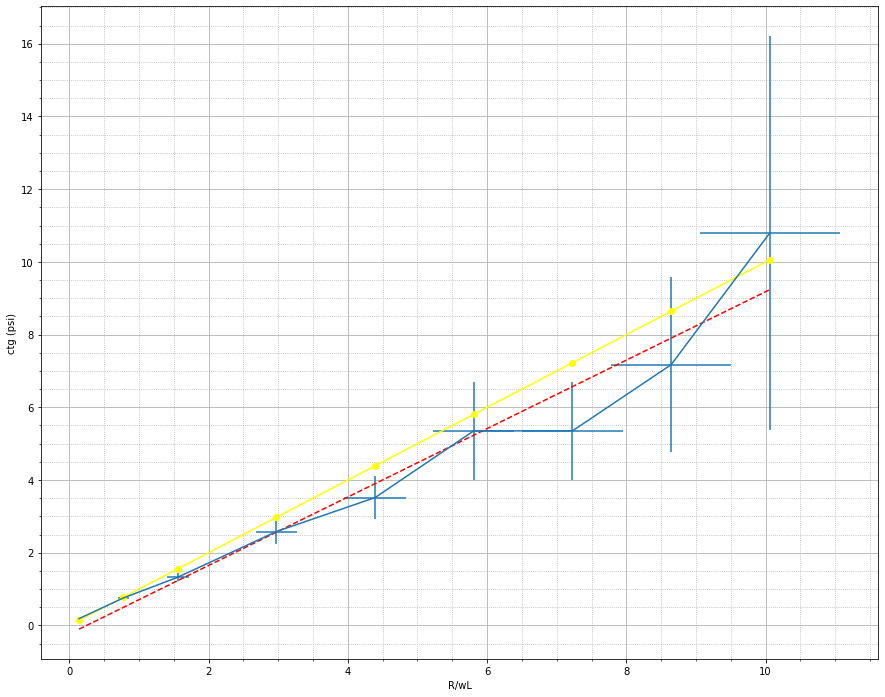

In [109]:
r = 12.4
r_l = 31.5
# Исследование сдвига фаз в RL-цепи
R_RL = np.array([0, 200, 445, 890, 1335, 1780, 2225, 2670, 3115])
x_RL = np.array([7.5, 5, 3.5, 2, 1.5, 1, 1, 0.75, 0.5])
x0_RL = np.array([34, 34, 34, 34, 34, 34, 34, 34, 34])
# print (len(R_RL), len(x_RL), len(x0_RL))

fig, ax = plt.subplots(figsize = (15, 12))
#axes = fig.add_axes([0, 0, 1, 1])

ax.set_ylabel("ctg (psi)")
ax.set_xlabel("R/wL")
ax.minorticks_on()
ax.grid(which = 'major')
ax.grid(which = 'minor', linestyle = ':')

R_wl = (R_RL + r + r_l) / (2 * 3.14 * 1000 * 50 * 10**(-3))
ctg_pi_x_x0 = 2 * 3.14 * x_RL / x0_RL
ctg_pi_x_x0 = np.array([ctg(i) for i in ctg_pi_x_x0])
ax.errorbar(R_wl, ctg_pi_x_x0, yerr = df2["sigma_ctg"], xerr = df2["sigma(R/wL)"])

p = np.polyfit(R_wl, ctg_pi_x_x0, 1)
ya = np.polyval(p, R_wl)
ax.plot(R_wl, ya, linestyle='dashed', color='red')

df2["R_RL, Om"] = R_RL
df2["x_RL, Om"] = x_RL
df2["x0_RL, Om"] = x0_RL
df2["R/(wL)"] = R_wl
df2["ctg_pi_x_x0"] = ctg_pi_x_x0

# Theoretical ctg(psi)
ax.plot(R_wl, R_wl, '-o', color='yellow')

plt.show()

In [106]:
df2["sigma(R/wL)"] = df2["R/(wL)"] * np.sqrt((1/df2["R_RL, Om"]) ** 2 + (10/1000))
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2 = df2.fillna(0)

df2["sigma_ctg"] = df2["x0_RL, Om"] / (2 * np.pi * df2["x_RL, Om"]) * np.sqrt((0.25/df2["x_RL, Om"]) ** 2 
                                                                                + (0.25/df2["x0_RL, Om"]) ** 2)


df2


,"R_RL, Om","x_RL, Om","x0_RL, Om",R/(wL),ctg_pi_x_x0,sigma(R/wL),sigma_ctg
0,0,7.50,34,0.139809,0.187660,0.000000,0.024628
1,200,5.00,34,0.776752,0.755901,0.077772,0.054695
2,445,3.50,34,1.557006,1.325117,0.155740,0.111018
3,890,2.00,34,2.974204,2.582734,0.297439,0.338789
4,1335,1.50,34,4.391401,3.516513,0.439152,0.601837
5,1780,1.00,34,5.808599,5.352304,0.580869,1.353402
6,2225,1.00,34,7.225796,5.352304,0.722587,1.353402
7,2670,0.75,34,8.642994,7.172448,0.864305,2.405593
8,3115,0.50,34,10.060191,10.797224,1.006024,5.411853


### Исследование зависимости свдига фаз от частосты в RCL-цепи.

In [118]:
df3 = pd.DataFrame()
df3 = pd.DataFrame()

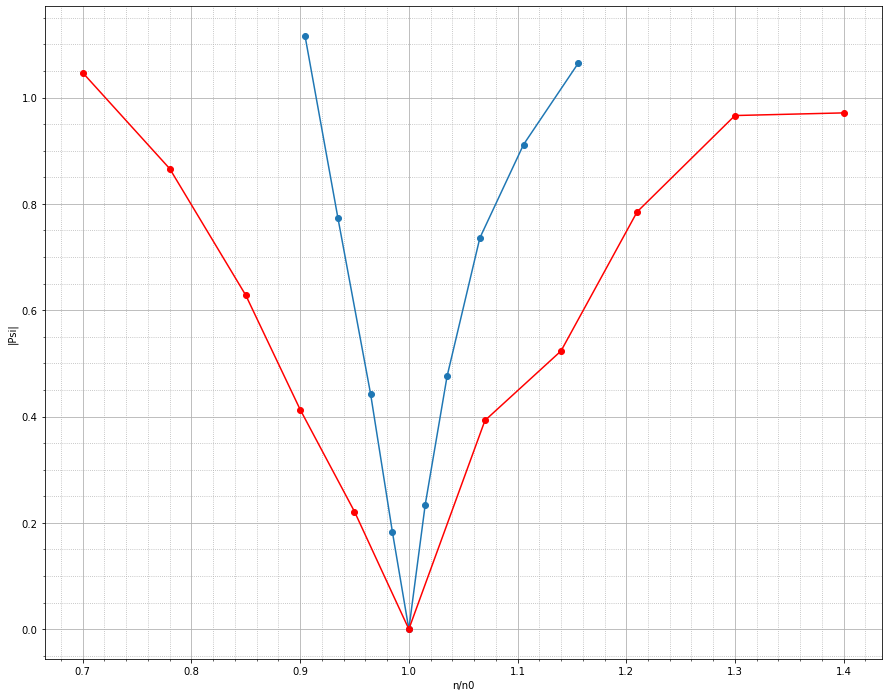

In [124]:
def ctg(x):
    return 1 / math.tan(x)

def sort(n_RLC):
    return n_RLC[-3:-6:-1] + n_RLC[-2:-1] + n_RLC[:1] + n_RLC[-1:] + n_RLC[1:5]

def sort1(a):
    return a[-1:5:-1] + a[:6]

r_l = 31.5
# RLС-цепь
# Для R = 0 Ом
n_RLC = [995, 1030, 1060, 1100, 1150, 960, 930, 900, 980, 1010]
n_RLC = np.array(sort(n_RLC))
# print (n_RLC)
x_RLC = [0, 2.5, 3.75, 4.5, 5, 2.5, 4.5, 6.75, 1, 1.25]
x_RLC = np.array(sort(x_RLC))
x0_RLC = [34.5, 33, 32, 31, 29.5, 35.5, 36.5, 38, 34.5, 33.5]
x0_RLC = np.array(sort(x0_RLC))
# print (len(n_RLC), len(x_RLC), len(x0_RLC))

# Для R = 100 Ом
n1_RLC = [1000, 1070, 1140, 1210, 1300, 1400, 950, 900, 850, 780, 700]
n1_RLC = np.array(sort1(n1_RLC))
# print(n1_RLC)
x1_RLC = [0, 1, 1.25, 1.75, 2, 3.75, 1.25, 2.5, 4, 6, 4]
x1_RLC = np.array(sort1(x1_RLC))
x01_RLC = [17, 16, 15, 14, 13, 24.25, 35.5, 38, 40, 43.5, 24]
x01_RLC = np.array(sort1(x01_RLC))
# print (len(n1_RLC), len(x1_RLC), len(x01_RLC))

fig, ax = plt.subplots(figsize = (15, 12))

ax.set_ylabel("|Psi|")
ax.set_xlabel("n/n0")
ax.minorticks_on()
ax.grid(which = 'major')
ax.grid(which = 'minor', linestyle = ':')

n_n0 = n_RLC / n_RLC[4]
ctg_pi_x_x0 = 2 * 3.14 * x_RLC / x0_RLC
ax.plot(n_n0, ctg_pi_x_x0, '-o')

df3["nu, Гц"] = n_RLC
df3["x_RLC, Om"] = x_RLC
df3["x0_RLC, Om"] = x0_RLC
df3["ctg_pi_x_x0"] = ctg_pi_x_x0

n_n0 = n1_RLC / n1_RLC[5]
# print(n_n0)
ctg_pi_x_x0 = 2 * 3.14 * x1_RLC / x01_RLC
ax.plot(n_n0, ctg_pi_x_x0, '-o', color='red')

df4["nu, Гц"] = n1_RLC
df4["x_RLC, Om"] = x1_RLC
df4["x0_RLC, Om"] = x01_RLC
df4["ctg_pi_x_x0"] = ctg_pi_x_x0

plt.show()

__Таблица значени для R = 0__

In [125]:
df3["sigma(nu/n_0)"] = df3["nu, Гц"]/n_RLC[4] * np.sqrt((10/df3["nu, Гц"]) ** 2 + (10/1000))

df3["sigma_ctg"] = df3["x0_RLC, Om"] / (2 * np.pi * df3["x_RLC, Om"]) * np.sqrt((0.25/df3["x_RLC, Om"]) ** 2 
                                                                                + (0.25/df3["x0_RLC, Om"]) ** 2)

df3.replace([np.inf, -np.inf], np.nan, inplace=True)
df3 = df3.fillna(0)

df3

,"nu, Гц","x_RLC, Om","x0_RLC, Om",ctg_pi_x_x0,sigma(nu/n_0),sigma_ctg
0,900,6.75,38.0,1.115526,0.091009,0.033704
1,930,4.50,36.5,0.774247,0.094006,0.072261
2,960,2.50,35.5,0.442254,0.097004,0.226560
3,980,1.00,34.5,0.182029,0.099004,1.373288
4,995,0.00,34.5,0.000000,0.100504,0.000000
5,1010,1.25,33.5,0.234328,0.102004,0.853664
6,1030,2.50,33.0,0.475758,0.104004,0.210687
7,1060,3.75,32.0,0.735938,0.107006,0.091161
8,1100,4.50,31.0,0.911613,0.111009,0.061550
9,1150,5.00,29.5,1.064407,0.116014,0.047620


__Таблица значени для R = 100__

In [126]:
df4["sigma(nu/n_0)"] = df4["nu, Гц"]/n_RLC[4] * np.sqrt((10/df4["nu, Гц"]) ** 2 + (10/1000))

df4["sigma_ctg"] = df4["x0_RLC, Om"] / (2 * np.pi * df4["x_RLC, Om"]) * np.sqrt((0.25/df4["x_RLC, Om"]) ** 2 
                                                                                + (0.25/df4["x0_RLC, Om"]) ** 2)

df4.replace([np.inf, -np.inf], np.nan, inplace=True)
df4 = df4.fillna(0)

df4

,"nu, Гц","x_RL, Om","x0_RL, Om",ctg_pi_x_x0,sigma(nu/n_0),"x_RLC, Om","x0_RLC, Om",sigma_ctg
0,700,4.00,24.00,1.046667,0.071066,4.00,24.00,0.060506
1,780,6.00,43.50,0.866207,0.079034,6.00,43.50,0.048533
2,850,4.00,40.00,0.628000,0.086016,4.00,40.00,0.099968
3,900,2.50,38.00,0.413158,0.091009,2.50,38.00,0.242438
4,950,1.25,35.50,0.221127,0.096005,1.25,35.50,0.904560
5,1000,0.00,17.00,0.000000,0.101004,0.00,17.00,0.000000
6,1070,1.00,16.00,0.392500,0.108006,1.00,16.00,0.637862
7,1140,1.25,15.00,0.523333,0.115013,1.25,15.00,0.383296
8,1210,1.75,14.00,0.785000,0.122023,1.75,14.00,0.183307
9,1300,2.00,13.00,0.966154,0.131039,2.00,13.00,0.130835


__Расчитаем добротность контура:__

$Q = \nu_0/(2\Delta\nu)$

$\sigma_Q = \sqrt{(\frac{\sigma_{\nu_0}}{\nu_0})^2 + (\frac{\sigma_{\Delta_\nu}}{\Delta_\nu})^2 }$

In [127]:
Q1 = 1/(2*(1.2 - 0.8))
print("Q1 = {:2f}".format(Q1))
sigma_q1 = np.sqrt((10 / 1000)**2 + (np.sqrt(10 ** 2 + 10 ** 2) / 400) ** 2)
print("sigmaQ1 = {:2f}".format(sigma_q1))
print("epsQ1 = {:2f}%".format(sigma_q1/Q1*100))

Q1 = 1.250000
sigmaQ1 = 0.036742
epsQ1 = 2.939388%


In [128]:
Q2 = 1/(2*(1.15 - 0.94))
print("Q2 = {:2f}".format(Q2))
sigma_q2 = np.sqrt((10 / 1000)**2 + (np.sqrt(10 ** 2 + 10 ** 2) / 210) ** 2)
print("sigmaQ2 = {:2f}".format(sigma_q2))
print("epsQ2 = {:2f}%".format(sigma_q2/Q2*100))

Q2 = 2.380952
sigmaQ2 = 0.068082
epsQ2 = 2.859441%


# 5. Вывод.

1) Мы изучили влияние активного сопротивления, индуктивности и ёмкость на свдиг фаз между током и напряжением в цепи переменного тока.

2) Посчитали добротность колебательного RCL - контура: 

$Q(R = 0) = 1.250 \pm 0.037$, 

$Q(R = 100) = 2.380 \pm 0.068$